# Caso Práctico: Neurona de McCulloch y Pitts

## 2. Aplicando la MPNeuron a un caso práctico real

### 2.1. Conjunto de datos

Esta es una copia de los conjuntos de datos de UCI ML Breast Cancer Wisconsin (Diagnóstico). https://goo.gl/U2Uwz2

Las características de entrada se calculan a partir de una imagen digitalizada de un aspirado de aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.

El plano de separación descrito anteriormente se obtuvo utilizando el método de árbol de múltiples superficies (MSM-T) [K. P. Bennett, "Construcción de un árbol de decisión mediante programación lineal". Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], un método de clasificación que utiliza la programación lineal para construir un árbol de decisión. Los rasgos relevantes se seleccionaron mediante una búsqueda exhaustiva en el espacio de 1-4 rasgos y 1-3 planos de separación.

El programa lineal real utilizado para obtener el plano de separación en el espacio tridimensional es el que se describe en: [K. P. Bennett y O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Esta base de datos también está disponible a través del servidor ftp UW CS:

ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

### Referencias

* W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
* O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.
* W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

### 2.3. Lectura del conjunto de datos

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
breast_cancer = load_breast_cancer()
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
X = breast_cancer.data
Y = breast_cancer.target

df = pd.DataFrame(X, columns=breast_cancer.feature_names)

X_train, X_test, y_train, y_test = train_test_split(df, Y, stratify=Y)

print("Tamaño del conjunto de datos de entrenamiento: ", len(X_train))
print("Tamaño del conjunto de datos de pruebas: ", len(X_test))

Tamaño del conjunto de datos de entrenamiento:  426
Tamaño del conjunto de datos de pruebas:  143


### 2.4. Implementación de una MPNeuron más avanzada

In [14]:
class MPNeuron:
    # variable del thresgold que se inicializara en el metodo fit
    def __init__(self):
        self.threshold = None
    
    # metodo encargado de iterar sobre la matriz de filas / columnas en X y entregar una funcion de activacion de la neurona
    def model(self, x):
        '''
        This method receive one vector with columns features and return the result of activation function.

        inputs:
        x <- np.array: Vector with records of features columns
        
        returns:
        (result of activation function) -> int
        '''
        return (sum(x) >= self.threshold)
    
    def predict(self, X):
        '''
        This method receive one matrix of records and return the result of the activation 
        function method called 'model' of this class.

        input:
        X <- np.matrix: Matrix of vectors with records 

        Return:
        Y -> np.array: Vector with records of target column 
        '''
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        '''
        this method receive two inputs args, and returns the threshold with the best accuracy score.

        input:
        x <- np.array: vector with records of columns features.
        y <- np.array: vector with records of diferent values of target column.

        return:
        threshold -> float(0.2): Value of threshold for the activation function.
        
        '''
        accuracy = {}
        # Seleccionamos un threshold entre el # de características de entrada
        for th in range(X.shape[1] + 1):
            self.threshold = th
            Y_pred = self.predict(X)
            accuracy[th] = accuracy_score(Y_pred, Y)
        # Seleccionamos el threshold que mejores resultados proporciona
        self.threshold = max(accuracy, key=accuracy.get)

Seguimos teniendo un problema debido a que en nuestro conjunto de datos las características de entrada reciben valores continuos, sin embargo, nuestra MPNeuron solo procesa características de entrada con valor binario

[0, 0, 1, 1, 1, 0, 0]
Categories (2, int64): [0 < 1]


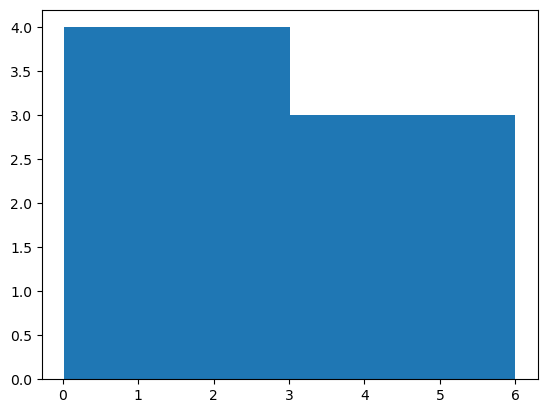

In [6]:
print(pd.cut([0.04, 2, 4, 5, 6, 0.02, 0.6], bins=2, labels=[0, 1]))

plt.hist([0.04, 0.3, 4, 5, 6, 0.02, 0.6], bins=2) 
plt.show()

In [7]:
# Transformamos las caracteríticas de entrada a un valor binario
X_train_bin = X_train.apply(pd.cut, bins=2, labels=[1, 0])
X_test_bin = X_test.apply(pd.cut, bins=2, labels=[1, 0])

X_train_bin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
69,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
444,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
406,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
562,1,0,1,1,0,0,0,1,0,1,...,1,0,1,1,1,0,0,0,1,0
284,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,0,1,1,0,1,1
280,0,0,0,1,1,1,1,1,1,1,...,0,0,0,1,0,1,1,0,1,1
67,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
197,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
# Instanciamos el modelo MPNeuron
mp_neuron = MPNeuron()

# Encontramos el threshold óptimo
mp_neuron.fit(X_train_bin.to_numpy(), y_train)

In [9]:
# Threshold óptimo seleccionado
mp_neuron.threshold

27

In [10]:
# Realizamos predicciones para ejemplos nuevos que no se encuentran en el conjunto de datos de entrenamiento
Y_pred = mp_neuron.predict(X_test_bin.to_numpy())

In [11]:
Y_pred

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
        True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True, False,

In [12]:
# Calculamos la exactitud de nuestra predicción
accuracy_score(y_test, Y_pred)

0.8671328671328671